In [2]:
#Veri seti linki : https://www.kaggle.com/datasets/usdot/flight-delays

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier



%matplotlib inline
sns.set(style="whitegrid")

print("Tüm kütüphaneler yüklendi.")

Tüm kütüphaneler yüklendi.


In [4]:
#DOSYA YOLLARI YÜKLEME KISMI
path_flights = r'C:\Users\mert\Desktop\veriseti\flights.csv'
path_airports = r'C:\Users\mert\Desktop\veriseti\airports.csv'
path_airlines = r'C:\Users\mert\Desktop\veriseti\airlines.csv'

In [5]:
def load_data(path_flights, path_airports, path_airlines):
   
    try:
        df_flights = pd.read_csv(path_flights, low_memory=False)
        print(f"Flights tablosu yüklendi. Boyut: {df_flights.shape}")
        
        df_airports = pd.read_csv(path_airports)
        print(f"Airports tablosu yüklendi. Boyut: {df_airports.shape}")
        
        df_airlines = pd.read_csv(path_airlines)
        print(f"Airlines tablosu yüklendi. Boyut: {df_airlines.shape}")
        
        return df_flights, df_airports, df_airlines
    
    except FileNotFoundError as e:
        print(f"Dosya bulunamadı. ({e})")
        return None, None, None
    except Exception as e:
        print(f"Hata oluştu. ({e})")
        return None, None, None

print("load_data fonksiyonu tanımlandı.")

load_data fonksiyonu tanımlandı.


In [6]:
try: 
    df_flights = pd.read_csv(path_flights, low_memory=False)
    print(f"Flights tablosunun boyutu : {df_flights.shape}")
    df_airports = pd.read_csv(path_airports)
    print(f"Airports tablosunun boyutu : {df_airports.shape}")
    df_airlines = pd.read_csv(path_airlines)
    print(f"Airlines tablosunun boyutu : {df_airlines.shape}")

except FileNotFoundError as e:
    print(f"Dosya bulunamadı. ({e})")

except Exception as e : 
    print(f"Hata oluştu. ({e})")

Flights tablosunun boyutu : (5819079, 31)
Airports tablosunun boyutu : (322, 7)
Airlines tablosunun boyutu : (14, 2)


In [7]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [8]:
df_airports.describe()

,LATITUDE,LONGITUDE
count,319.000000,319.000000
mean,38.981244,-98.378964
std,8.616736,21.523492
min,13.483450,-176.646030
25%,33.652040,-110.839385
50%,39.297610,-93.403070
75%,43.154675,-82.722995
max,71.285450,-64.798560


In [9]:
print("her sütunda bulunan toplam null değer sayısı")
df_airports.isnull().sum()

her sütunda bulunan toplam null değer sayısı


IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [10]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_airports.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


IATA_CODE    322
AIRPORT      322
CITY         308
STATE         54
COUNTRY        1
LATITUDE     319
LONGITUDE    319
dtype: int64

In [11]:
print("Airports tablosunun ilk 5 satırı: ")
df_airports.head(5)

Airports tablosunun ilk 5 satırı: 


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [12]:
print("Airports tablosunun son 5 satırı ")
df_airports.tail(5)

Airports tablosunun son 5 satırı 


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023
321,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597


In [13]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


In [14]:
df_airlines.describe()

,IATA_CODE,AIRLINE
count,14,14
unique,14,14
top,UA,United Air Lines Inc.
freq,1,1


In [15]:
print("her sütunda bulunan toplam null değer sayısı")
df_airlines.isnull().sum()

her sütunda bulunan toplam null değer sayısı


IATA_CODE    0
AIRLINE      0
dtype: int64

In [16]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_airlines.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


IATA_CODE    14
AIRLINE      14
dtype: int64

In [17]:
print("Airlines tablosunun ilk 5 satırı ")
df_airlines.head(5)

Airlines tablosunun ilk 5 satırı 


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [18]:
print("Airlines tablosunun son 5 satırı: ")
df_airlines.tail(5)

Airlines tablosunun son 5 satırı: 


,IATA_CODE,AIRLINE
9,DL,Delta Air Lines Inc.
10,EV,Atlantic Southeast Airlines
11,HA,Hawaiian Airlines Inc.
12,MQ,American Eagle Airlines Inc.
13,VX,Virgin America


In [19]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [20]:
df_flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [21]:
print("her sütunda bulunan toplam null değer sayısı")
df_flights.isnull().sum()

her sütunda bulunan toplam null değer sayısı


YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [22]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_flights.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          628
DESTINATION_AIRPORT     629
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64

In [23]:
print("Flights tablosunun ilk 5 satırı ")
df_flights.head(5)

Flights tablosunun ilk 5 satırı 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
print("Flights tablosunun son 5 satırı: ")
df_flights.tail(5)

Flights tablosunun son 5 satırı: 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
def preprocess_pipeline(df_flights_split, df_airlines_full, df_airports_full):
  
    #TABLO BİRLEŞTİRME İŞLEMLERİ
  
    df = pd.merge(df_flights_split, df_airlines_full, left_on='AIRLINE', right_on='IATA_CODE', how='left')
    df.drop('IATA_CODE', axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_ORIGIN'), left_on='ORIGIN_AIRPORT', right_on='IATA_CODE_ORIGIN', how='left')
    df.drop(['IATA_CODE_ORIGIN'], axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_DEST'), left_on='DESTINATION_AIRPORT', right_on='IATA_CODE_DEST', how='left')
    df.drop(['IATA_CODE_DEST'], axis=1, inplace=True)

    # FAZLA NULL DEĞERLER BARINDIRAN SÜTUNLARIN SİLİNMESİ
    high_null_cols = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
    df.drop(columns=high_null_cols, inplace=True)

    #İptal edilen uçuşlar ve yönlendirilen uçuşların kaldırılması.
    
    df = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)].copy()
    df.drop(columns=['CANCELLED', 'DIVERTED'], inplace=True)

    #Amerika'da uçuşlar 15 dakikadan fazla gecikme olduğu zaman uçuş gecikmiş sayıldığı için 'IS_DELAYED' değişkeni oluşturup bunun üzerinden kontrol edeceğiz.
    df['IS_DELAYED'] = (df['ARRIVAL_DELAY'] > 15).astype(int)

    # veri setindeki 'SCHEDULED_DEPARTURE' kısmında saatler normal yazılmamıştır örn: 5,10,15 gibi . Bunu gece sabah öğle akşam ve gece yarısı olarak günün bölümlerine ayırıyoruz.
    df['SCHEDULED_HOUR'] = df['SCHEDULED_DEPARTURE'].astype(str).str.zfill(4).str[:2].astype(int)
    bins = [-1, 5, 11, 16, 20, 23]
    labels = ['Gece (00-05)', 'Sabah (06-11)', 'Öğle (12-16)', 'Akşam (17-20)', 'Gece Yarısı (21-23)']
    df['TIME_OF_DAY'] = pd.cut(df['SCHEDULED_HOUR'], bins=bins, labels=labels, ordered=False)

    silinecek_sutunlar = [
          #sızıntı yapanlar
        'DEPARTURE_TIME',
        'DEPARTURE_DELAY',
        'TAXI_OUT',
        'WHEELS_OFF',
        'ELAPSED_TIME',
        'AIR_TIME',
        'WHEELS_ON',
        'TAXI_IN',
        'ARRIVAL_TIME',
        'ARRIVAL_DELAY',

        #gereksizler hepsi aynı değer
        'YEAR',
        'COUNTRY_ORIGIN',
        'COUNTRY_DEST',
        
        #gürültüye sebebiyet verenler
        'TAIL_NUMBER',        
        'FLIGHT_NUMBER',

        #eklenen zenginleştirmeler
        'AIRLINE_NAME',
        'AIRPORT_ORIGIN',
        'CITY_ORIGIN',
        'STATE_ORIGIN',
        'LATITUDE_ORIGIN',
        'LONGITUDE_ORIGIN',
        'AIRPORT_DEST',
        'CITY_DEST',
        'STATE_DEST',
        'LATITUDE_DEST',
        'LONGITUDE_DEST',


        #gereksiz değişkenler
        'SCHEDULED_DEPARTURE', 
        'SCHEDULED_HOUR', 
        'SCHEDULED_ARRIVAL'
    ]
    df.drop(columns=silinecek_sutunlar, inplace=True)
    
    df.dropna(inplace=True)

    return df

print("preprocess_pipeline fonksiyonu tanımlandı.")

preprocess_pipeline fonksiyonu tanımlandı.


In [26]:
def encode_features(X_train, X_test, y_train):

   #Target encoding yapıyoruz. Yanı havalimanı kodları yerine ortalama gecikme oranı yazılıyor. One hot encoding yapmaya kalksak çok havalimanı kodu olduğundan çok fazla sütun çıkardı o yüzden target encoding en mantıklısı.
    
    target_encode_cols = ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
    ohe_cols = ['AIRLINE', 'TIME_OF_DAY']

    # veri sızıntısını önleme
    train_data_temp = X_train.copy()
    train_data_temp['IS_DELAYED'] = y_train

    for col in target_encode_cols:
        mapping = train_data_temp.groupby(col)['IS_DELAYED'].mean()
        X_train[col + '_ENCODED'] = X_train[col].map(mapping)
        X_test[col + '_ENCODED'] = X_test[col].map(mapping)
        global_mean = y_train.mean()
        X_train[col + '_ENCODED'] = X_train[col + '_ENCODED'].fillna(global_mean)
        X_test[col + '_ENCODED']  = X_test[col + '_ENCODED'].fillna(global_mean)
        
    # ohe 
    X_train = pd.get_dummies(X_train, columns=ohe_cols, prefix=ohe_cols, dtype=int)
    X_test = pd.get_dummies(X_test, columns=ohe_cols, prefix=ohe_cols, dtype=int)

    # sütun hizalama
    train_cols = X_train.columns
    X_test = X_test.reindex(columns=train_cols, fill_value=0)

    # eski sütunları silme
    X_train.drop(columns=target_encode_cols, inplace=True)
    X_test.drop(columns=target_encode_cols, inplace=True)
    
    print("Encoding işlemleri tamamlandı.")
    return X_train, X_test

print("encode_features fonksiyonu tanımlandı.")

encode_features fonksiyonu tanımlandı.


In [27]:
#dosya yolları
BASE_PATH = r'C:/Users/mert/Desktop/veriseti'
path_flights = f'{BASE_PATH}/flights.csv' 
path_airports = f'{BASE_PATH}/airports.csv'
path_airlines = f'{BASE_PATH}/airlines.csv'

#veri yükleme
df_flights, df_airports, df_airlines = load_data(path_flights, path_airports, path_airlines)

if df_flights is not None:
    
    #veriyi test ve train olarak bölme
    
    flights_train, flights_test = train_test_split(df_flights, test_size=0.2, random_state=42)
    print(f"Flights Train boyutu: {flights_train.shape}")
    print(f"Flights Test boyutu: {flights_test.shape}")
    

    df_airlines.rename(columns={'AIRLINE': 'AIRLINE_NAME'}, inplace=True)
    
    print("\nEğitim verisi için proses pipeline fonksiyonu çağırılıyor ")
    train_df = preprocess_pipeline(flights_train, df_airlines, df_airports)
    
    print("Test verisi için proses pipeline fonksiyonu çağırılıyor")
    test_df = preprocess_pipeline(flights_test, df_airlines, df_airports)
    

    print(f"Train Veri Boyutu: {train_df.shape}")
    print(f"Test Veri Boyutu: {test_df.shape}")

else:
    print("Veri yüklenemedi, işlemler durduruldu.")

Flights tablosu yüklendi. Boyut: (5819079, 31)
Airports tablosu yüklendi. Boyut: (322, 7)
Airlines tablosu yüklendi. Boyut: (14, 2)
Flights Train boyutu: (4655263, 31)
Flights Test boyutu: (1163816, 31)

Eğitim verisi için proses pipeline fonksiyonu çağırılıyor 
Test verisi için proses pipeline fonksiyonu çağırılıyor
Train Veri Boyutu: (4571137, 10)
Test Veri Boyutu: (1142871, 10)


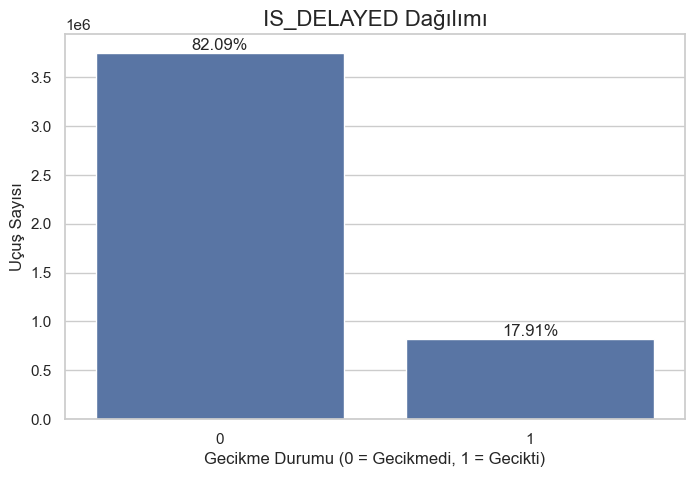


Sayısal Değişkenlerin Dağılımı ('DISTANCE','SCHEDULED_TIME'):


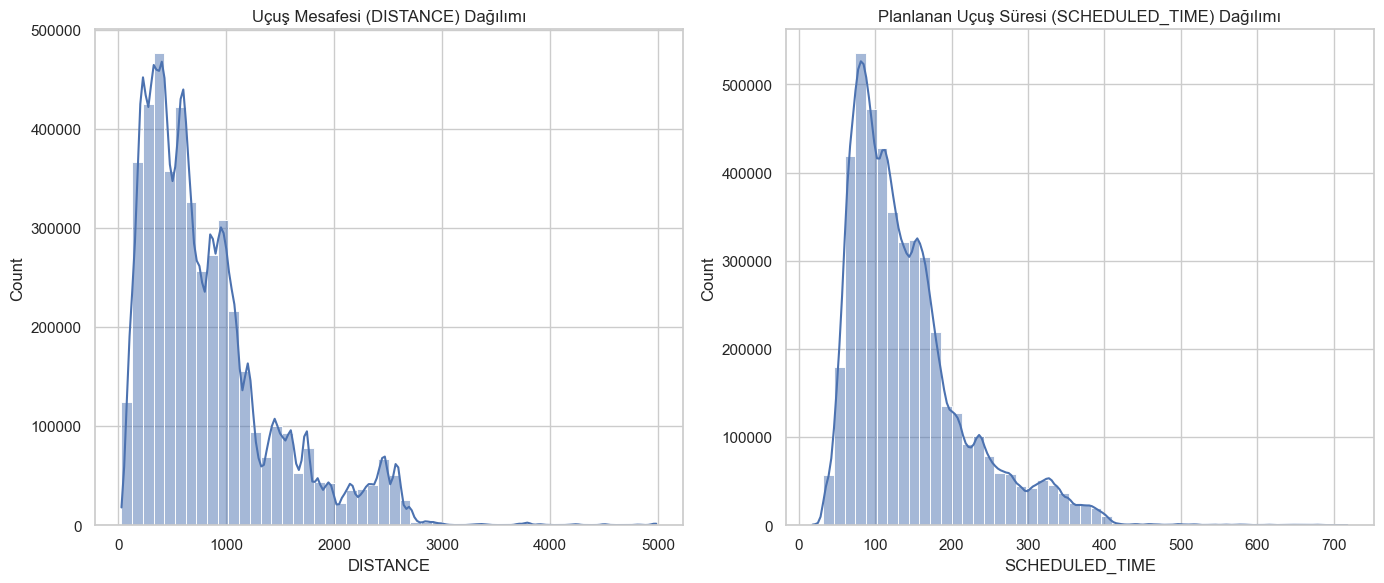


Sayısal Değişkenler ve Hedef Değişken Arasındaki Korelasyon:


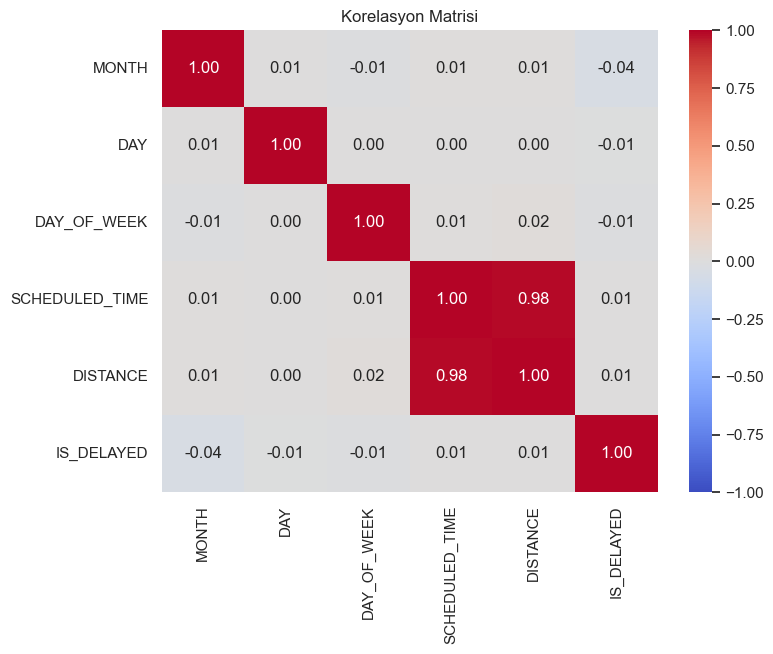

In [28]:
if 'train_df' in locals():
  

    # EDA
    plt.figure(figsize=(8, 5))
    sns.countplot(x='IS_DELAYED', data=train_df)
    plt.title('IS_DELAYED Dağılımı', fontsize=16)
    plt.xlabel('Gecikme Durumu (0 = Gecikmedi, 1 = Gecikti)')
    plt.ylabel('Uçuş Sayısı')
    
    # yüzde hesaplama
    
    total = len(train_df)
    ax = plt.gca()
    for p in ax.patches:
        percentage = f'{(p.get_height() / total * 100):.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
    plt.show()
  


    # Histogram
    
    print(f"\nSayısal Değişkenlerin Dağılımı ('DISTANCE','SCHEDULED_TIME'):")
    
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(train_df['DISTANCE'], kde=True, bins=50)
    plt.title('Uçuş Mesafesi (DISTANCE) Dağılımı')

    plt.subplot(1, 2, 2)
    sns.histplot(train_df['SCHEDULED_TIME'], kde=True, bins=50)
    plt.title('Planlanan Uçuş Süresi (SCHEDULED_TIME) Dağılımı')
    plt.tight_layout()
    plt.show()


    # Korelasyon

    # numeric_features değişkenini otomatik oluştur
    numeric_features = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Eğer hedef sütun listede ise çıkar
    if 'IS_DELAYED' in numeric_features:
        numeric_features.remove('IS_DELAYED')
    
    print("\nSayısal Değişkenler ve Hedef Değişken Arasındaki Korelasyon:")
    
    # Korelasyon matrisi
    corr_df = train_df[numeric_features + ['IS_DELAYED']].dropna().corr()    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Korelasyon Matrisi')
    plt.show()
    

else:
    print("Veriler bulunamadı.")

In [29]:
if 'train_df' in locals():
    # x = özellik, y = hedef oluşturma
    
    X_train = train_df.drop('IS_DELAYED', axis=1)
    y_train = train_df['IS_DELAYED']
    
    X_test = test_df.drop('IS_DELAYED', axis=1)
    y_test = test_df['IS_DELAYED']

    # Encoding
    
    X_train_encoded, X_test_encoded = encode_features(X_train, X_test, y_train)
  
    print(f"Eğitime hazır X_train_encoded boyutu: {X_train_encoded.shape}")
    print(f"Teste hazır X_test_encoded boyutu: {X_test_encoded.shape}")
    
 
    
else:
    print("Veriler bulunamadı.")

Encoding işlemleri tamamlandı.
Eğitime hazır X_train_encoded boyutu: (4571137, 26)
Teste hazır X_test_encoded boyutu: (1142871, 26)


In [30]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# StratifiedKFold (Sınıf dengeli çapraz doğrulama)
# 5 katlı bir doğrulama yapısı kuruyoruz.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Gerekli kütüphaneler ve StratifiedKFold ayarlandı.")

Gerekli kütüphaneler ve StratifiedKFold ayarlandı.


In [31]:
import warnings
warnings.filterwarnings('ignore') # Tüm uyarıları gizler


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, average_precision_score, mean_absolute_error


# AdaBoost yavaş bir algoritmadır, 100.000 veri ideal bir denge sağlar.
TRAIN_SAMPLE_SIZE = 100000 
TEST_SAMPLE_SIZE = 20000   
# ----------------------------------------------

if 'X_train_encoded' in locals() and 'y_train' in locals():
    print("--- AdaBoost Classifier Model (Optimize Edilmiş) ---")

    # 1. ADIM: EĞİTİM VERİSİNİ ÖRNEKLEME
    if len(X_train_encoded) > TRAIN_SAMPLE_SIZE:
        print(f"Veri seti çok büyük. Hız için {TRAIN_SAMPLE_SIZE} örnek Stratified (Orantılı) seçiliyor...")
        
        X_train_sample, _, y_train_sample, _ = train_test_split(
            X_train_encoded, 
            y_train, 
            train_size=TRAIN_SAMPLE_SIZE, 
            stratify=y_train,  # Sınıf dengesini korur
            random_state=42
        )
    else:
        X_train_sample = X_train_encoded
        y_train_sample = y_train
        print("Mevcut eğitim verisinin tamamı kullanılıyor.")

    # 2. ADIM: TEST VERİSİNİ ÖRNEKLEME
    # Test süresini kısaltmak için test verisini de sınırlıyoruz
    if 'X_test_encoded' in locals() and len(X_test_encoded) > TEST_SAMPLE_SIZE:
        X_test_sample, _, y_test_sample, _ = train_test_split(
            X_test_encoded, 
            y_test, 
            train_size=TEST_SAMPLE_SIZE, 
            stratify=y_test,
            random_state=42
        )
    else:
        X_test_sample = X_test_encoded
        y_test_sample = y_test

    print(f"İşlenecek Eğitim Seti: {X_train_sample.shape}")
    print(f"İşlenecek Test Seti  : {X_test_sample.shape}")
    print("-" * 30)

    # 3. ADIM: ADABOOST MODEL TANIMI
    # Base estimator: Decision Stump (derinliği 1 olan ağaç)
    # n_estimators: Veriyi küçülttüğümüz için istersen burayı 100 yapabilirsin, 
    # ama 50 de gayet yeterli ve hızlıdır.
    ada_clf = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        learning_rate=1.0,
        random_state=42
    )
    
    print("AdaBoost Modeli eğitiliyor (Sample veri ile)...")
    # DİKKAT: _sample verileri ile eğitiyoruz
    ada_clf.fit(X_train_sample, y_train_sample)
    
    print("Tahminler yapılıyor...")
    # DİKKAT: _sample verileri ile test ediyoruz
    y_pred_ada = ada_clf.predict(X_test_sample)
    y_proba_ada = ada_clf.predict_proba(X_test_sample)[:, 1]

    # 4. ADIM: METRİKLER
    # Test sample üzerinden sonuçları hesaplıyoruz
    acc_ada = accuracy_score(y_test_sample, y_pred_ada) * 100
    roc_auc_ada = roc_auc_score(y_test_sample, y_proba_ada) * 100
    pr_auc_ada = average_precision_score(y_test_sample, y_proba_ada) * 100
    mae_ada = mean_absolute_error(y_test_sample, y_pred_ada) * 100

    print(f"\nAdaBoost Model Accuracy  : {acc_ada:.2f}%")
    print(f"AdaBoost Model ROC-AUC   : {roc_auc_ada:.2f}%")
    print(f"AdaBoost Model PR-AUC    : {pr_auc_ada:.2f}%")
    print(f"AdaBoost Model MAE       : {mae_ada:.2f}%")
    print("-" * 30)

    print("\nAdaBoost Classification Report:")
    print(classification_report(y_test_sample, y_pred_ada, zero_division=0))

else:
    print("Hata: Eğitim verileri bulunamadı.")

--- AdaBoost Classifier Model (Optimize Edilmiş) ---
Veri seti çok büyük. Hız için 100000 örnek Stratified (Orantılı) seçiliyor...
İşlenecek Eğitim Seti: (100000, 26)
İşlenecek Test Seti  : (20000, 26)
------------------------------
AdaBoost Modeli eğitiliyor (Sample veri ile)...
Tahminler yapılıyor...

AdaBoost Model Accuracy  : 82.09%
AdaBoost Model ROC-AUC   : 63.88%
AdaBoost Model PR-AUC    : 26.83%
AdaBoost Model MAE       : 17.90%
------------------------------

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16419
           1       0.00      0.00      0.00      3581

    accuracy                           0.82     20000
   macro avg       0.41      0.50      0.45     20000
weighted avg       0.67      0.82      0.74     20000



In [32]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, average_precision_score, mean_absolute_error

# Ayarlar
TRAIN_SAMPLE_SIZE = 100000 
TEST_SAMPLE_SIZE = 20000   
K_FEATURES = 15  # Seçilecek en iyi özellik sayısı (İhtiyaca göre değiştirebilirsin)

if 'X_train_encoded' in locals() and 'y_train' in locals():
    print("--- AdaBoost Classifier & Feature Selection (SelectKBest) ---")

    # 1. ADIM: EĞİTİM VERİSİNİ ÖRNEKLEME (Hız için)
    if len(X_train_encoded) > TRAIN_SAMPLE_SIZE:
        print(f"Veri seti çok büyük. {TRAIN_SAMPLE_SIZE} örnek seçiliyor...")
        X_train_sample, _, y_train_sample, _ = train_test_split(
            X_train_encoded, y_train, 
            train_size=TRAIN_SAMPLE_SIZE, 
            stratify=y_train, 
            random_state=42
        )
    else:
        X_train_sample, y_train_sample = X_train_encoded, y_train

    # 2. ADIM: TEST VERİSİNİ ÖRNEKLEME
    if 'X_test_encoded' in locals() and len(X_test_encoded) > TEST_SAMPLE_SIZE:
        X_test_sample, _, y_test_sample, _ = train_test_split(
            X_test_encoded, y_test, 
            train_size=TEST_SAMPLE_SIZE, 
            stratify=y_test, 
            random_state=42
        )
    else:
        X_test_sample, y_test_sample = X_test_encoded, y_test

    # ---------------------------------------------------------
    # 3. ADIM: FEATURE SELECTION (SelectKBest - ANOVA F)
    # ---------------------------------------------------------
    print(f"Özellik seçimi yapılıyor: En iyi {K_FEATURES} özellik seçiliyor...")
    
    selector = SelectKBest(score_func=f_classif, k=K_FEATURES)
    
    # Sadece eğitim verisiyle fit ediyoruz (Veri sızıntısını önlemek için)
    X_train_selected = selector.fit_transform(X_train_sample, y_train_sample)
    
    # Test verisini aynı seçici ile dönüştürüyoruz
    X_test_selected = selector.transform(X_test_sample)
    
    # Seçilen özelliklerin isimlerini görmek istersen:
    selected_cols = selector.get_feature_names_out()
    print(f"Seçilen Özellikler: {list(selected_cols)}")
    print("-" * 30)

    # 4. ADIM: ADABOOST MODEL TANIMI VE EĞİTİM
    ada_clf = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        learning_rate=1.0,
        random_state=42
    )
    
    print("AdaBoost Modeli seçilmiş özelliklerle eğitiliyor...")
    ada_clf.fit(X_train_selected, y_train_sample)
    
    # 5. ADIM: TAHMİN VE DEĞERLENDİRME
    print("Tahminler yapılıyor...")
    y_pred_ada = ada_clf.predict(X_test_selected)
    y_proba_ada = ada_clf.predict_proba(X_test_selected)[:, 1]

    # Metrikler
    acc_ada = accuracy_score(y_test_sample, y_pred_ada) * 100
    roc_auc_ada = roc_auc_score(y_test_sample, y_proba_ada) * 100
    pr_auc_ada = average_precision_score(y_test_sample, y_proba_ada) * 100
    mae_ada = mean_absolute_error(y_test_sample, y_pred_ada) * 100

    print(f"\nAdaBoost Model Sonuçları (K={K_FEATURES}):")
    print(f"Accuracy  : {acc_ada:.2f}%")
    print(f"ROC-AUC   : {roc_auc_ada:.2f}%")
    print(f"PR-AUC    : {pr_auc_ada:.2f}%")
    print(f"MAE       : {mae_ada:.2f}%")
    print("-" * 30)

    print("\nAdaBoost Classification Report:")
    print(classification_report(y_test_sample, y_pred_ada, zero_division=0))

else:
    print("Hata: Eğitim verileri (X_train_encoded, y_train) bulunamadı.")

--- AdaBoost Classifier & Feature Selection (SelectKBest) ---
Veri seti çok büyük. 100000 örnek seçiliyor...
Özellik seçimi yapılıyor: En iyi 15 özellik seçiliyor...
Seçilen Özellikler: ['MONTH', 'ORIGIN_AIRPORT_ENCODED', 'DESTINATION_AIRPORT_ENCODED', 'AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_F9', 'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'TIME_OF_DAY_Gece (00-05)', 'TIME_OF_DAY_Sabah (06-11)', 'TIME_OF_DAY_Öğle (12-16)', 'TIME_OF_DAY_Akşam (17-20)', 'TIME_OF_DAY_Gece Yarısı (21-23)']
------------------------------
AdaBoost Modeli seçilmiş özelliklerle eğitiliyor...
Tahminler yapılıyor...

AdaBoost Model Sonuçları (K=15):
Accuracy  : 82.08%
ROC-AUC   : 63.66%
PR-AUC    : 26.64%
MAE       : 17.91%
------------------------------

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16419
           1       0.00      0.00      0.00      3581

    accuracy                           0.82     20000
  

--- Sade Hal (Hepsi) Modeli Çalıştırılıyor ---
--- SelectKBest (K=15) Modeli Çalıştırılıyor ---


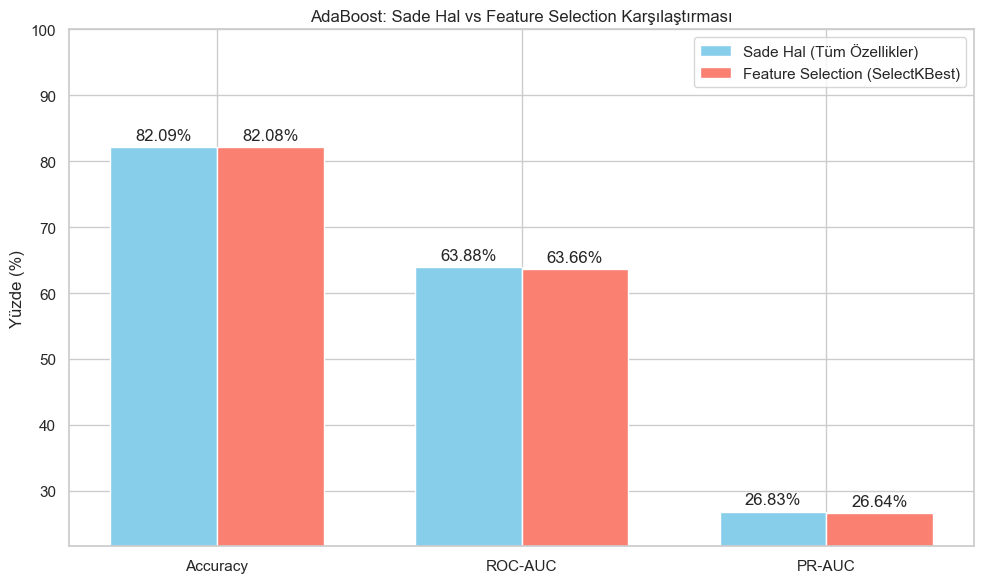

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sonuçları depolamak için bir liste
results = []

def run_experiment(name, X_tr, X_te, y_tr, y_te):
    print(f"--- {name} Modeli Çalıştırılıyor ---")
    
    # Model Tanımı
    model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        random_state=42
    )
    
    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)
    probs = model.predict_proba(X_te)[:, 1]
    
    # Metrik Hesaplama
    acc = accuracy_score(y_te, preds) * 100
    roc = roc_auc_score(y_te, probs) * 100
    pr = average_precision_score(y_te, probs) * 100
    
    return {"Model": name, "Accuracy": acc, "ROC-AUC": roc, "PR-AUC": pr}

# 1. Deney: Sade Hal (Tüm Özellikler)
# Örneklenmiş X_train_sample ve X_test_sample kullandığını varsayıyoruz
results.append(run_experiment("Sade Hal (Hepsi)", X_train_sample, X_test_sample, y_train_sample, y_test_sample))

# 2. Deney: Feature Selection (SelectKBest)
selector = SelectKBest(score_func=f_classif, k=15)
X_train_sel = selector.fit_transform(X_train_sample, y_train_sample)
X_test_sel = selector.transform(X_test_sample)

results.append(run_experiment("SelectKBest (K=15)", X_train_sel, X_test_sel, y_train_sample, y_test_sample))

# --- GÖRSELLEŞTİRME ---
df_res = pd.DataFrame(results)

# Grafik Ayarları
labels = ['Accuracy', 'ROC-AUC', 'PR-AUC']
sade_scores = df_res.iloc[0, 1:].values
feature_scores = df_res.iloc[1, 1:].values

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, sade_scores, width, label='Sade Hal (Tüm Özellikler)', color='skyblue')
rects2 = ax.bar(x + width/2, feature_scores, width, label='Feature Selection (SelectKBest)', color='salmon')

# Etiketler ve Başlık
ax.set_ylabel('Yüzde (%)')
ax.set_title('AdaBoost: Sade Hal vs Feature Selection Karşılaştırması')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(min(sade_scores.min(), feature_scores.min()) - 5, 100) # Dinamik alt sınır

# Sütun üzerine değerleri yazma
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

In [34]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, average_precision_score, mean_absolute_error

# Ayarlar
TRAIN_SAMPLE_SIZE = 100000 
TEST_SAMPLE_SIZE = 20000   
N_COMPONENTS = 10  # Verinin indirgeneceği yeni boyut (bileşen) sayısı

if 'X_train_encoded' in locals() and 'y_train' in locals():
    print(f"--- AdaBoost Classifier & Dimensionality Reduction (TruncatedSVD) ---")

    # 1. ADIM: EĞİTİM VE TEST VERİSİNİ ÖRNEKLEME
    # Eğitim Örneklemesi
    if len(X_train_encoded) > TRAIN_SAMPLE_SIZE:
        X_train_sample, _, y_train_sample, _ = train_test_split(
            X_train_encoded, y_train, train_size=TRAIN_SAMPLE_SIZE, stratify=y_train, random_state=42
        )
    else:
        X_train_sample, y_train_sample = X_train_encoded, y_train

    # Test Örneklemesi
    if 'X_test_encoded' in locals() and len(X_test_encoded) > TEST_SAMPLE_SIZE:
        X_test_sample, _, y_test_sample, _ = train_test_split(
            X_test_encoded, y_test, train_size=TEST_SAMPLE_SIZE, stratify=y_test, random_state=42
        )
    else:
        X_test_sample, y_test_sample = X_test_encoded, y_test

    # ---------------------------------------------------------
    # 2. ADIM: BOYUT İNDİRGEME (TruncatedSVD)
    # ---------------------------------------------------------
    print(f"Boyut indirgeme yapılıyor: {X_train_sample.shape[1]} özellik -> {N_COMPONENTS} bileşen...")
    
    svd = TruncatedSVD(n_components=N_COMPONENTS, random_state=42)
    
    # Sadece eğitim verisiyle fit edilir
    X_train_svd = svd.fit_transform(X_train_sample)
    
    # Test verisi aynı dönüşümle indirgenir
    X_test_svd = svd.transform(X_test_sample)
    
    # Açıklanan Varyans (Modelin veriyi ne kadar temsil ettiği)
    explained_variance = svd.explained_variance_ratio_.sum() * 100
    print(f"Toplam Açıklanan Varyans: %{explained_variance:.2f}")
    print("-" * 30)

    # 3. ADIM: ADABOOST MODEL TANIMI
    ada_clf = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        learning_rate=1.0,
        random_state=42
    )
    
    print("AdaBoost Modeli SVD bileşenleri ile eğitiliyor...")
    ada_clf.fit(X_train_svd, y_train_sample)
    
    # 4. ADIM: TAHMİN VE METRİKLER
    y_pred_ada = ada_clf.predict(X_test_svd)
    y_proba_ada = ada_clf.predict_proba(X_test_svd)[:, 1]

    acc_ada = accuracy_score(y_test_sample, y_pred_ada) * 100
    roc_auc_ada = roc_auc_score(y_test_sample, y_proba_ada) * 100
    pr_auc_ada = average_precision_score(y_test_sample, y_proba_ada) * 100
    mae_ada = mean_absolute_error(y_test_sample, y_pred_ada) * 100

    print(f"\nSVD sonrası AdaBoost Sonuçları:")
    print(f"Accuracy  : {acc_ada:.2f}%")
    print(f"ROC-AUC   : {roc_auc_ada:.2f}%")
    print(f"PR-AUC    : {pr_auc_ada:.2f}%")
    print(f"MAE       : {mae_ada:.2f}%")
    print("-" * 30)

    print("\nClassification Report:")
    print(classification_report(y_test_sample, y_pred_ada, zero_division=0))

else:
    print("Hata: Eğitim verileri bulunamadı.")

--- AdaBoost Classifier & Dimensionality Reduction (TruncatedSVD) ---
Boyut indirgeme yapılıyor: 26 özellik -> 10 bileşen...
Toplam Açıklanan Varyans: %100.00
------------------------------
AdaBoost Modeli SVD bileşenleri ile eğitiliyor...

SVD sonrası AdaBoost Sonuçları:
Accuracy  : 82.08%
ROC-AUC   : 60.74%
PR-AUC    : 24.18%
MAE       : 17.93%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     16419
           1       0.00      0.00      0.00      3581

    accuracy                           0.82     20000
   macro avg       0.41      0.50      0.45     20000
weighted avg       0.67      0.82      0.74     20000



Sade Hal eğitiliyor...
SVD uygulanıyor (N=10)...


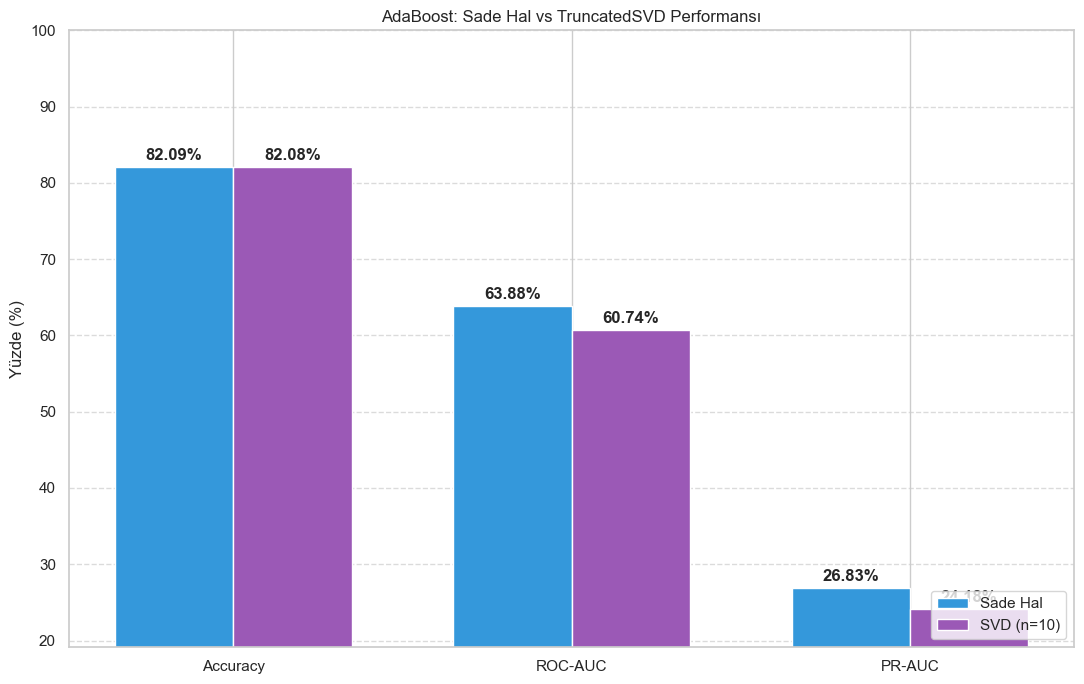

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD

# Sonuçları saklamak için liste
comp_results = []

def evaluate_model(name, X_tr, X_te, y_tr, y_te):
    model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        random_state=42
    )
    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)
    probs = model.predict_proba(X_te)[:, 1]
    
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_te, preds) * 100,
        "ROC-AUC": roc_auc_score(y_te, probs) * 100,
        "PR-AUC": average_precision_score(y_te, probs) * 100
    }

# 1. Deney: Sade Hal (Tüm Özellikler)
print("Sade Hal eğitiliyor...")
comp_results.append(evaluate_model("Sade Hal (Tüm Özellikler)", X_train_sample, X_test_sample, y_train_sample, y_test_sample))

# 2. Deney: TruncatedSVD (Boyut İndirgeme)
print(f"SVD uygulanıyor (N={N_COMPONENTS})...")
svd_obj = TruncatedSVD(n_components=N_COMPONENTS, random_state=42)
X_tr_svd = svd_obj.fit_transform(X_train_sample)
X_te_svd = svd_obj.transform(X_test_sample)
comp_results.append(evaluate_model(f"SVD (n={N_COMPONENTS})", X_tr_svd, X_te_svd, y_train_sample, y_test_sample))

# --- GÖRSELLEŞTİRME ---
df_plot = pd.DataFrame(comp_results)

labels = ['Accuracy', 'ROC-AUC', 'PR-AUC']
sade_scores = df_plot.iloc[0, 1:].values
svd_scores = df_plot.iloc[1, 1:].values

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(11, 7))
rects1 = ax.bar(x - width/2, sade_scores, width, label='Sade Hal', color='#3498db')
rects2 = ax.bar(x + width/2, svd_scores, width, label=f'SVD (n={N_COMPONENTS})', color='#9b59b6')

# Grafik Detayları
ax.set_ylabel('Yüzde (%)')
ax.set_title('AdaBoost: Sade Hal vs TruncatedSVD Performansı')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')
ax.set_ylim(min(sade_scores.min(), svd_scores.min()) - 5, 100)

# Değerleri sütunların üzerine yazma
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontweight='bold')

add_labels(rects1)
add_labels(rects2)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

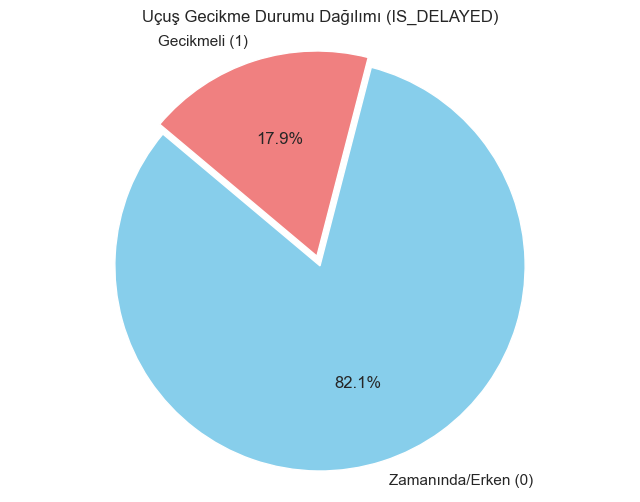

In [40]:
# Gecikme Durumu (IS_DELAYED) Dağılımı - Pie Chart
if 'train_df' in locals():
    delay_counts = train_df['IS_DELAYED'].value_counts()
    labels = ['Zamanında/Erken (0)', 'Gecikmeli (1)']
    
    plt.figure(figsize=(8, 6))
    plt.pie(delay_counts, labels=labels, autopct='%1.1f%%', startangle=140, 
            colors=['skyblue', 'lightcoral'], explode=(0.05, 0))
    plt.title('Uçuş Gecikme Durumu Dağılımı (IS_DELAYED)')
    plt.axis('equal') 
    plt.show()

Sade Hal Modeli işleniyor...
Özellik Seçimi (K=15) işleniyor...
Boyut İndirgeme (SVD N=10) işleniyor...


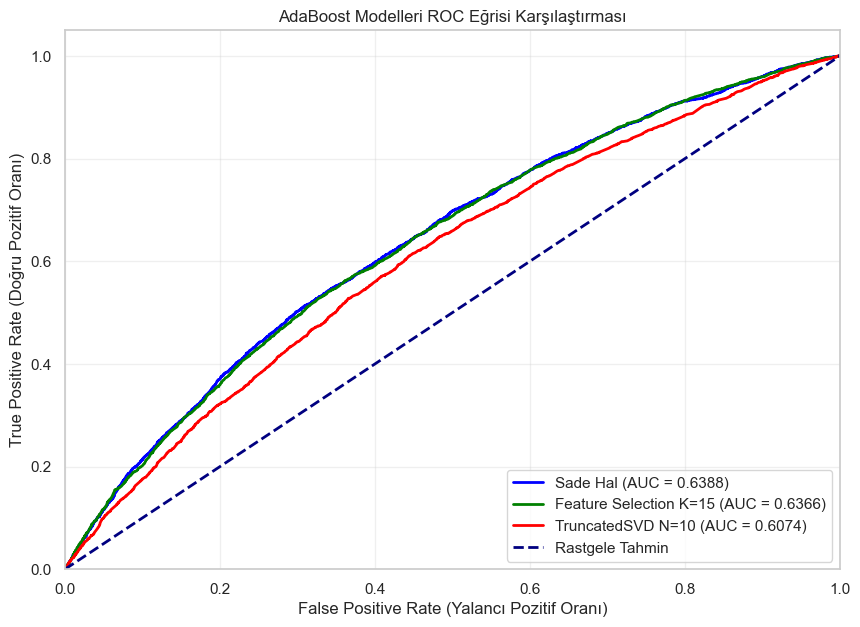

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import TruncatedSVD

# --- AYARLAR VE ÖRNEKLEME ---
# Notebook'unuzdaki hızı korumak için aynı örnekleme miktarlarını kullanıyoruz
TRAIN_SAMPLE = 100000
TEST_SAMPLE = 20000

X_train_s, _, y_train_s, _ = train_test_split(X_train_encoded, y_train, train_size=TRAIN_SAMPLE, stratify=y_train, random_state=42)
X_test_s, _, y_test_s, _ = train_test_split(X_test_encoded, y_test, train_size=TEST_SAMPLE, stratify=y_test, random_state=42)

# Ortak Model Parametresi
base_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

plt.figure(figsize=(10, 7))

# --- 1. SADE HAL (TÜM ÖZELLİKLER) ---
print("Sade Hal Modeli işleniyor...")
base_ada.fit(X_train_s, y_train_s)
y_proba_sade = base_ada.predict_proba(X_test_s)[:, 1]
fpr_sade, tpr_sade, _ = roc_curve(y_test_s, y_proba_sade)
roc_auc_sade = auc(fpr_sade, tpr_sade)
plt.plot(fpr_sade, tpr_sade, label=f'Sade Hal (AUC = {roc_auc_sade:.4f})', color='blue', lw=2)

# --- 2. FEATURE SELECTION (SelectKBest K=15) ---
print("Özellik Seçimi (K=15) işleniyor...")
selector = SelectKBest(score_func=f_classif, k=15)
X_train_fs = selector.fit_transform(X_train_s, y_train_s)
X_test_fs = selector.transform(X_test_s)

base_ada.fit(X_train_fs, y_train_s)
y_proba_fs = base_ada.predict_proba(X_test_fs)[:, 1]
fpr_fs, tpr_fs, _ = roc_curve(y_test_s, y_proba_fs)
roc_auc_fs = auc(fpr_fs, tpr_fs)
plt.plot(fpr_fs, tpr_fs, label=f'Feature Selection K=15 (AUC = {roc_auc_fs:.4f})', color='green', lw=2)

# --- 3. BOYUT İNDİRGEME (TruncatedSVD N=10) ---
print("Boyut İndirgeme (SVD N=10) işleniyor...")
svd = TruncatedSVD(n_components=10, random_state=42)
X_train_svd = svd.fit_transform(X_train_s)
X_test_svd = svd.transform(X_test_s)

base_ada.fit(X_train_svd, y_train_s)
y_proba_svd = base_ada.predict_proba(X_test_svd)[:, 1]
fpr_svd, tpr_svd, _ = roc_curve(y_test_s, y_proba_svd)
roc_auc_svd = auc(fpr_svd, tpr_svd)
plt.plot(fpr_svd, tpr_svd, label=f'TruncatedSVD N=10 (AUC = {roc_auc_svd:.4f})', color='red', lw=2)

# --- GRAFİK DETAYLARI ---
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Rastgele Tahmin')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Yalancı Pozitif Oranı)')
plt.ylabel('True Positive Rate (Doğru Pozitif Oranı)')
plt.title('AdaBoost Modelleri ROC Eğrisi Karşılaştırması')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

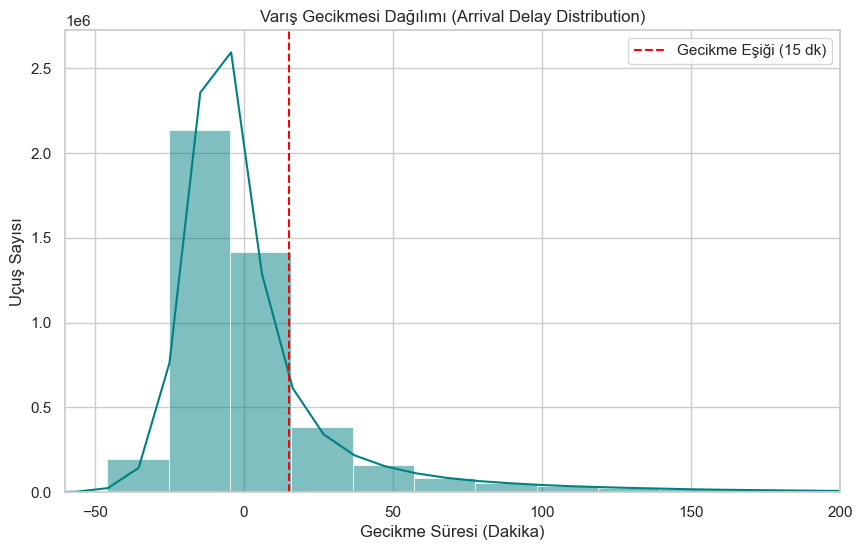

In [41]:
# Varış Gecikmesi Dağılımı (ARRIVAL_DELAY) - Histogram
if 'flights_train' in locals():
    plt.figure(figsize=(10, 6))
    sns.histplot(flights_train['ARRIVAL_DELAY'].dropna(), bins=100, color='teal', kde=True)
    plt.xlim(-60, 200) # Verinin yoğun olduğu kısma odaklanalım
    plt.title('Varış Gecikmesi Dağılımı (Arrival Delay Distribution)')
    plt.xlabel('Gecikme Süresi (Dakika)')
    plt.ylabel('Uçuş Sayısı')
    plt.axvline(x=15, color='red', linestyle='--', label='Gecikme Eşiği (15 dk)')
    plt.legend()
    plt.show()